## **Get data from Spotify API**

In [1]:
%pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# get connection to spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
client_id ='48f32c174b0b4de2a363ba3382083b20'
client_secret = '9872ad4453aa48d583ae88e79abd555c'

In [4]:
# lets connect to spotify

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(auth_manager=auth_manager)



In [5]:
# lets get features

def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    accousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, accousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]

    return track

In [6]:
# get data from spotify

import pandas as pd

# create function get_song

def get_songs():
    tracks = []
    for i in range(0,1000,50):
        song = sp.search(q='year:2023', type='track', limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)

    df = pd.DataFrame(tracks,columns=['name','album','artist','release_date','length','popularity','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','time_signature'])
    
    return df


In [7]:
df = get_songs()
df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Fast Car,Gettin' Old,Luke Combs,2023-03-24,265493,92,0.186,0.712,0.603,0.000000,0.1150,-5.520,0.0262,97.994,4
1,Ella Baila Sola,Ella Baila Sola,Eslabon Armado,2023-03-16,165671,98,0.483,0.668,0.758,0.000019,0.0837,-5.176,0.0332,147.989,3
2,un x100to,un x100to,Grupo Frontera,2023-04-17,194563,99,0.228,0.569,0.724,0.000000,0.2700,-4.076,0.0474,83.118,4
3,Last Night,3 Songs At A Time Sampler,Morgan Wallen,2023-01-31,163854,91,0.459,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,4
4,Last Night,One Thing At A Time,Morgan Wallen,2023-03-03,163854,90,0.467,0.492,0.675,0.000000,0.1420,-5.456,0.0389,203.759,4


In [8]:
# transform to csv
df.to_csv('spotify.csv', index=False)

In [9]:
# check duplicates df
duplict = df.duplicated().sum()
print('Its {} duplicates'.format(duplict))


Its 950 duplicates


In [10]:
# lets drop duplicates data
df_no_dups = df.drop_duplicates()

In [11]:
df_no_dups.to_csv('spotify_no_dups.csv', index=False)

In [12]:
df_no_dups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              50 non-null     object 
 1   album             50 non-null     object 
 2   artist            50 non-null     object 
 3   release_date      50 non-null     object 
 4   length            50 non-null     int64  
 5   popularity        50 non-null     int64  
 6   acousticness      50 non-null     float64
 7   danceability      50 non-null     float64
 8   energy            50 non-null     float64
 9   instrumentalness  50 non-null     float64
 10  liveness          50 non-null     float64
 11  loudness          50 non-null     float64
 12  speechiness       50 non-null     float64
 13  tempo             50 non-null     float64
 14  time_signature    50 non-null     int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 6.2+ KB


In [13]:
df_no_dups['artist'].value_counts()

Taylor Swift      11
Morgan Wallen      5
Metro Boomin       4
Jimin              2
Eslabon Armado     2
Lil Uzi Vert       2
Lil Durk           2
Luke Combs         1
Peso Pluma         1
Miley Cyrus        1
Chino Pacas        1
Noah Kahan         1
Fuerza Regida      1
Lil Mabu           1
Dua Lipa           1
Post Malone        1
Bizarrap           1
David Kushner      1
Junior H           1
Kaliii             1
Drake              1
FIFTY FIFTY        1
Gunna              1
Olivia Rodrigo     1
Bad Bunny          1
PinkPantheress     1
Yng Lvcas          1
Grupo Frontera     1
Nicki Minaj        1
Name: artist, dtype: int64

In [14]:
# lets get an artist name
artist = ['Mr.Big','Cher','Josh Groban','Katy Perry','Passion']

In [21]:
# get song from artist

def get_song():
    tracks = []
    for i in artist:
        song = sp.search(q=i, type='track', limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)

    df_song = pd.DataFrame(tracks,columns=['name','album','artist','release_date','length','popularity','acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','time_signature'])

    return df_song

In [22]:
df_song = get_song()
df_song

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Mr. Big Stuff,Mr. Big Stuff,Jean Knight,1971,164560,69,0.29000,0.886,0.491,0.000002,0.2290,-12.589,0.1710,93.236,4
1,To Be With You - 2021 Remastered,Lean Into It (30th Anniversary Edition),Mr. Big,1991,208080,73,0.35900,0.688,0.284,0.000000,0.1270,-13.577,0.0574,83.433,4
2,Mr. Big,Comin Out Hard,8Ball & MJG,1993,353853,44,0.00458,0.856,0.500,0.001920,0.0915,-10.697,0.2850,155.863,4
3,Mr. Big Bank Budda,I Am Mr. Mosely,Drakeo the Ruler,2017-04-07,209319,40,0.04430,0.714,0.859,0.000000,0.1000,-4.778,0.1020,94.031,4
4,Mr. Biggs,Feds Watching,Lil Double 0,2023-03-08,161625,45,0.10500,0.666,0.544,0.000000,0.1660,-4.577,0.2820,144.940,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Passionfruit - Remix,Passionfruit (Remix),BRIONBEATS,2022-08-05,287179,6,0.01290,0.762,0.574,0.590000,0.1270,-10.986,0.1690,117.446,4
246,Passion,Passion,Jim Yosef,2015-06-13,240009,40,0.01020,0.614,0.953,0.000002,0.8540,-3.275,0.0818,128.012,4
247,Passion,Passion,Lucifer (voice actor : Kazuya Yamashita),2021-06-24,248421,40,0.71300,0.732,0.628,0.000003,0.0779,-10.812,0.1190,114.021,4
248,Passionate,missunderstood…still,Queen Naija,2020-10-30,231483,33,0.65100,0.468,0.446,0.000002,0.1710,-6.996,0.0417,137.982,4


In [24]:
# check df_song duplicates
df_song.duplicated().sum()

0

In [25]:
# convert into csv
df_song.to_csv('spotify_top_artist.csv', index=False)

### **EDA**

In [27]:
# show popularity top 10
df_song.sort_values(by='popularity', ascending=False)[['artist','name','popularity']].head(10)

,artist,name,popularity
7,The Killers,Mr. Brightside,89
200,Drake,Passionfruit,88
94,Beach House,Space Song,83
57,Cher,Believe,82
154,Katy Perry,Roar,82
167,Katy Perry,Dark Horse,82
178,Katy Perry,Unconditionally,81
156,Alesso,When I’m Gone (with Katy Perry),80
158,Katy Perry,Dark Horse,80
150,Katy Perry,Last Friday Night (T.G.I.F.),79


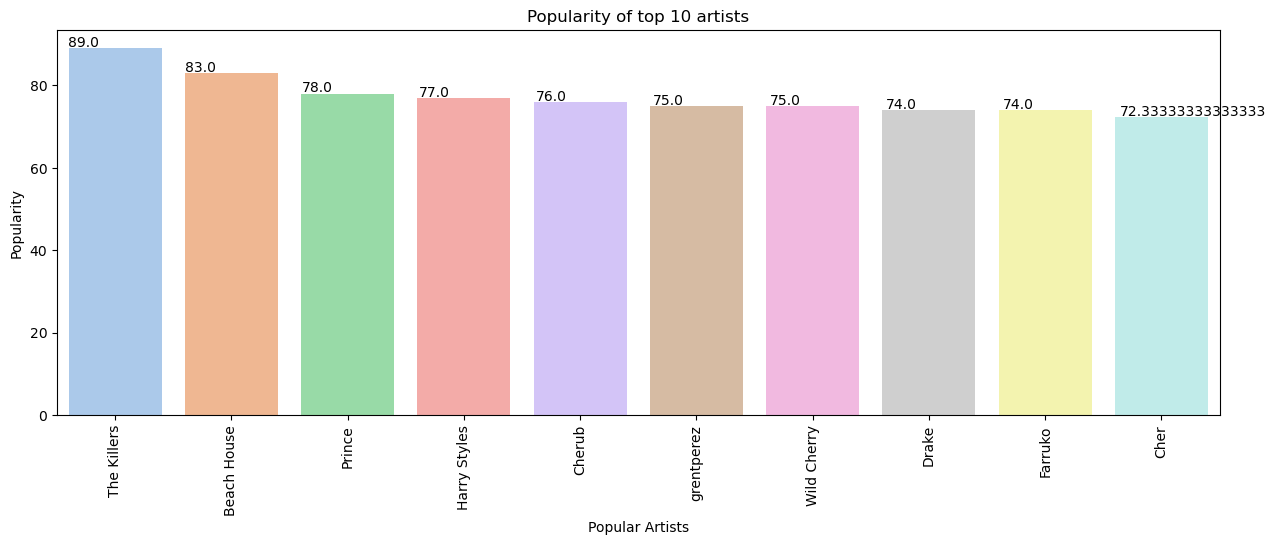

In [56]:
# show visualization from popularity
import matplotlib.pyplot as plt
import seaborn as sns

x = df_song.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)

fig,ax = plt.subplots(figsize=(15,5))

ax = sns.barplot(x=x.index, y=x.values,palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Popularity of top 10 artists')
ax.set_ylabel('Popularity')
ax.set_xlabel('Popular Artists')
# set notation value on chart bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


<Figure size 2000x1000 with 0 Axes>

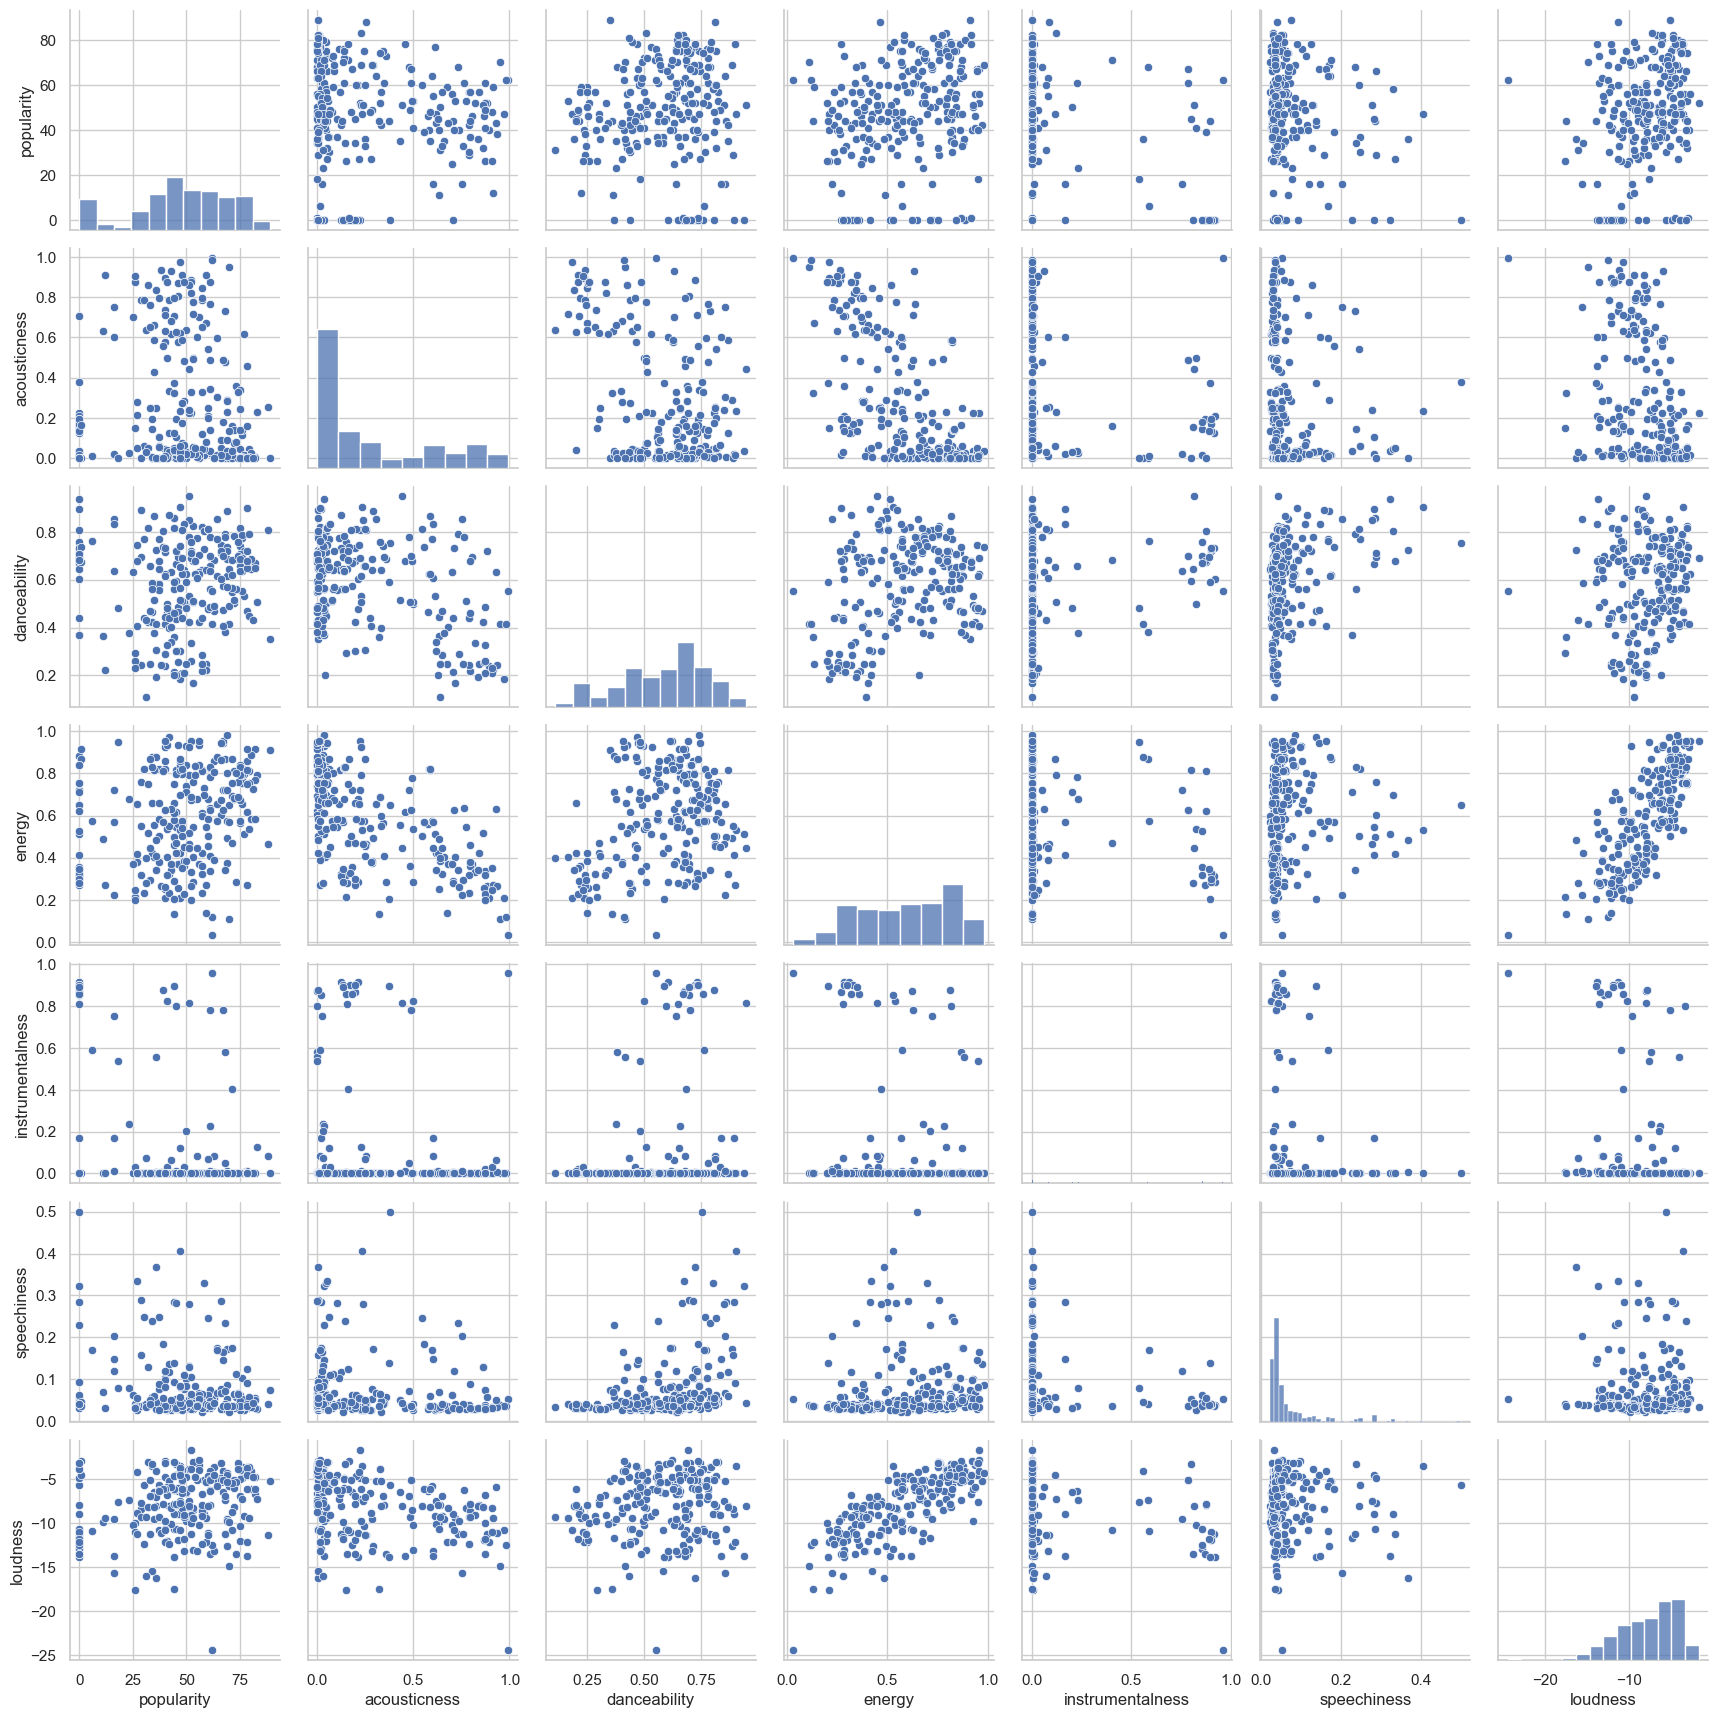

In [61]:
# showing data distribution

plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
cols =['popularity','acousticness','danceability','energy','instrumentalness','speechiness','loudness']
sns.pairplot(df_song[cols],palette='pastel')


<AxesSubplot:>

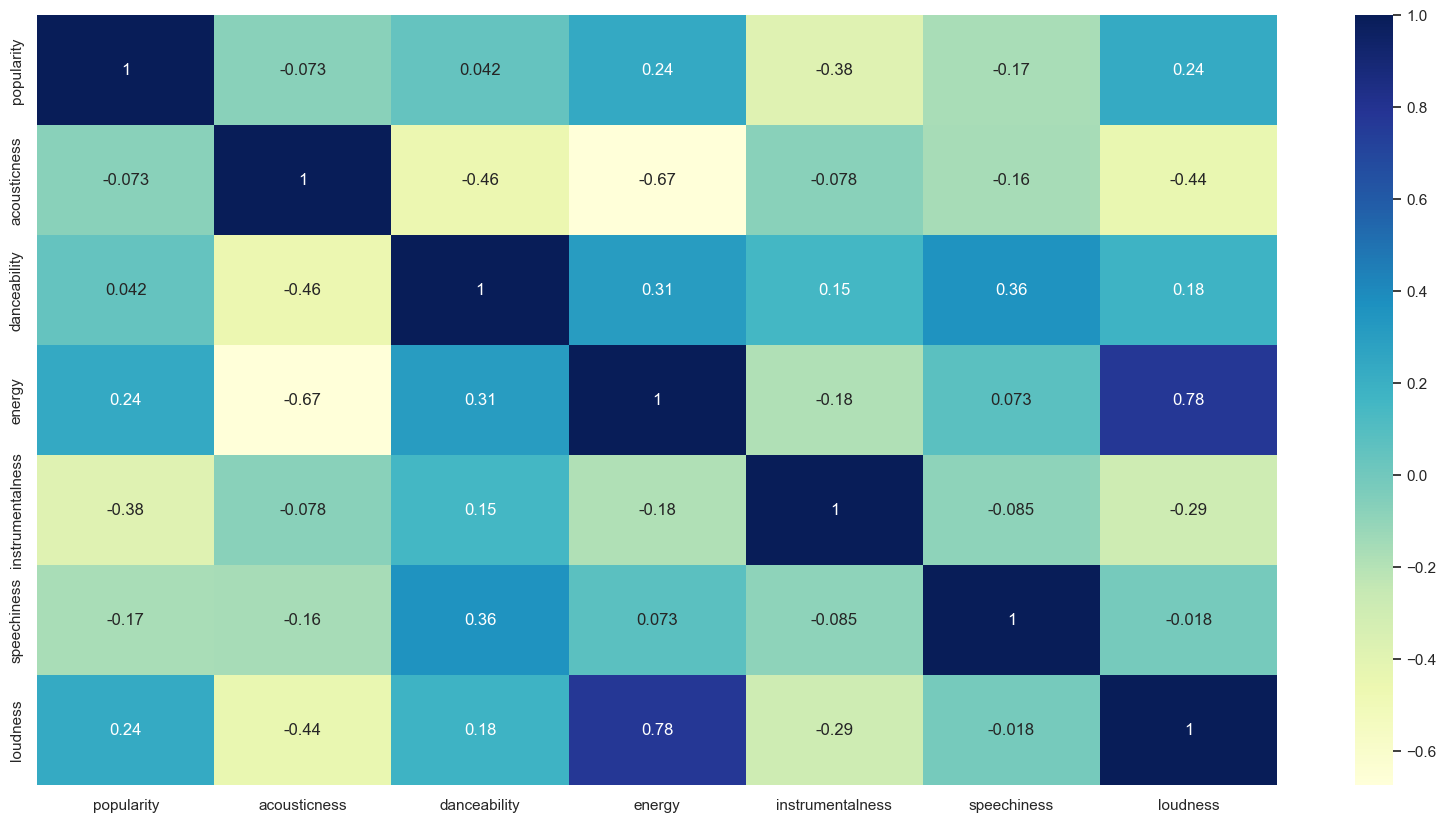

In [67]:
# showing correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_song[cols].corr(),cmap='YlGnBu',annot=True)



## **Preprocessing**

In [69]:
# feature selection

df2 = df.drop(['release_date','name','album','artist','popularity'], axis=1)
df2.sample(3)

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
773,200454,0.0632,0.707,0.681,0.000005,0.0322,-4.325,0.0668,117.999,4
768,212241,0.0025,0.629,0.733,0.000000,0.3570,-5.445,0.0419,120.001,4
472,188361,0.2640,0.854,0.668,0.000056,0.1170,-7.848,0.0466,132.966,3


In [70]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2),columns=df2.columns)
df2.sample(3)

,length,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
133,1.461222,-0.998906,-1.448057,-0.175218,-0.165451,-0.545186,1.109304,-0.532650,0.349328,0.436436
899,-1.643818,1.694140,0.989178,-0.549616,-0.164023,0.530278,-1.222918,1.695513,0.434913,0.436436
624,-0.392705,-0.524725,1.114165,1.124964,-0.164653,-0.489559,-0.150806,-0.263891,0.179564,-2.291288


## **Modeling**

In [78]:
# create model using Kmeans
from sklearn.cluster import KMeans

cluster =[]

for i in range(1,11):
    model = KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42,max_iter=1000)
    model.fit(df2)
    cluster.append(model.inertia_)

Text(0.5, 1.0, 'Elbow curve')

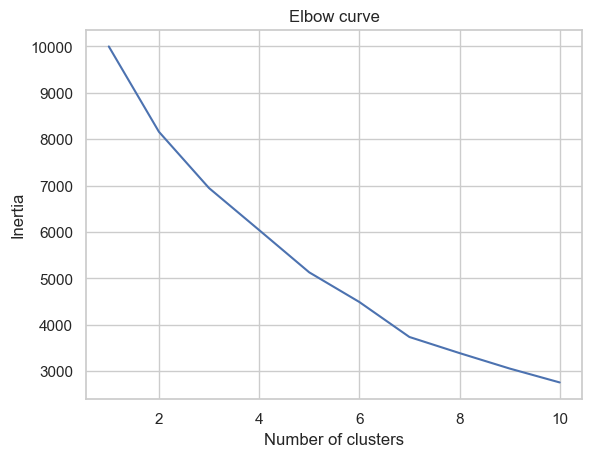

In [80]:
# showing elbow curve

plt.plot(range(1,11),cluster)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')


In [81]:
# predict cluster
model = KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=42,max_iter=1000)
y_kmeans = model.fit_predict(df2)

In [82]:
df['cluster'] = y_kmeans

In [84]:
df.sample(7)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
706,Boy's a Liar Pt. 2,Boy's a liar Pt. 2,PinkPantheress,2023-02-03,131013,95,0.25200,0.696,0.809,0.000128,0.248,-8.254,0.0500,132.962,4,2
87,Enchanted (Taylor's Version),Speak Now (Taylor's Version),Taylor Swift,2023-07-07,353253,86,0.01200,0.505,0.532,0.000000,0.149,-3.526,0.0265,81.907,4,1
357,WHERE SHE GOES,WHERE SHE GOES,Bad Bunny,2023-05-18,231704,100,0.14300,0.652,0.800,0.629000,0.112,-4.019,0.0614,143.978,4,1
791,Speak Now (Taylor's Version),Speak Now (Taylor's Version),Taylor Swift,2023-07-07,242473,85,0.24800,0.727,0.677,0.000000,0.143,-2.871,0.0325,118.995,4,1
983,Back To December (Taylor's Version),Speak Now (Taylor's Version),Taylor Swift,2023-07-07,294189,86,0.00621,0.497,0.635,0.000000,0.117,-3.927,0.0273,142.063,4,1
320,TQM,TQM,Fuerza Regida,2023-05-19,158965,95,0.27300,0.786,0.853,0.000000,0.106,-4.955,0.0589,125.107,3,0
16,You Proof,One Thing At A Time,Morgan Wallen,2023-03-03,157477,87,0.26500,0.732,0.839,0.000000,0.602,-5.007,0.0345,119.724,4,1
